# Understanding the Rate of Digital Technology Adoption in Brazil's Basic Private Schools

Private schools are a major component of Brazil's educational system, accounting for nearly 25% of all schools and enrolling over 9 million students as of 2022. This report is designed to assist edtech companies in comprehending the unique attributes of these schools, their expansion trends, and how technological developments influence their teaching and administrative methods in diverse sizes and regions.

The scope of this analysis is limited to what we define as 'basic education,' encompassing institutions that offer education from preschool through to high school.

## Loading the database and inspecting the data

The source of this analysis is the Educational Census, collected anually by INEP, National Institute of Studies and Educational Research. The raw data was sanitized by the non profit organization [Base dos Dados](https://basedosdados.org/). A comple of filters were applied to examine just the target schools:
- ano: >= 2013 (last 10 years from the date of this study)
- rede: 4 (indicates that this is a private school)
- tipo_situacao_funcionamento: 1 (indicates that, at the year of the census, the school was active)

Raw source and dictionary: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar

Sanitized data: https://basedosdados.org/dataset/dae21af4-4b6a-42f4-b94a-4c2061ea9de5?table=b88bf231-0288-40ce-9a3f-72535a88fa40

In [46]:
# Single file containing 10 years of Census data
census_data = './_data/inep_censo_privado.csv'

In [47]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Disable the limit of columns to be shown
pd.set_option('display.max_columns', 0)

In [49]:
# First look at the data
df = pd.read_csv(census_data, low_memory = False)
df

,ano,sigla_uf,id_municipio,id_escola,rede,tipo_categoria_escola_privada,tipo_localizacao,tipo_localizacao_diferenciada,tipo_situacao_funcionamento,id_orgao_regional,data_ano_letivo_inicio,data_ano_letivo_termino,vinculo_secretaria_educacao,vinculo_seguranca_publica,vinculo_secretaria_saude,vinculo_outro_orgao,poder_publico_parceria,tipo_poder_publico_parceria,conveniada_poder_publico,tipo_convenio_poder_publico,forma_contratacao_termo_colaboracao,forma_contratacao_termo_fomento,forma_contratacao_acordo_cooperacao,forma_contratacao_prestacao_servico,forma_contratacao_cooperacao_tecnica_financeira,forma_contratacao_consorcio_publico,tipo_atendimento_escolarizacao,tipo_atendimento_atividade_complementar,tipo_atendimento_aee,mantenedora_escola_privada_empresa,mantenedora_escola_privada_ong,mantenedora_escola_privada_oscip,mantenedora_escola_privada_ong_oscip,mantenedora_escola_privada_sindicato,mantenedora_escola_privada_sistema_s,mantenedora_escola_privada_sem_fins,cnpj_escola_privada,cnpj_mantenedora,tipo_regulamentacao,tipo_responsavel_regulamentacao,...,quantidade_matricula_ead,quantidade_matricula_infantil_integral,quantidade_matricula_infantil_creche_integral,quantidade_matricula_infantil_pre_escola_integral,quantidade_matricula_fundamental_integral,quantidade_matricula_fundamental_anos_iniciais_integral,quantidade_matricula_fundamental_anos_finais_integral,quantidade_matricula_medio_integral,quantidade_docente_educacao_basica,quantidade_docente_infantil,quantidade_docente_infantil_creche,quantidade_docente_infantil_pre_escola,quantidade_docente_fundamental,quantidade_docente_fundamental_anos_iniciais,quantidade_docente_fundamental_anos_finais,quantidade_docente_medio,quantidade_docente_profissional,quantidade_docente_profissional_tecnica,quantidade_docente_eja,quantidade_docente_eja_fundamental,quantidade_docente_eja_medio,quantidade_docente_especial,quantidade_docente_especial_comum,quantidade_docente_especial_exclusiva,quantidade_turma_educacao_basica,quantidade_turma_infantil,quantidade_turma_infantil_creche,quantidade_turma_infantil_pre_escola,quantidade_turma_fundamental,quantidade_turma_fundamental_anos_iniciais,quantidade_turma_fundamental_anos_finais,quantidade_turma_medio,quantidade_turma_profissional,quantidade_turma_profissional_tecnica,quantidade_turma_eja,quantidade_turma_eja_fundamental,quantidade_turma_eja_medio,quantidade_turma_especial,quantidade_turma_especial_comum,quantidade_turma_especial_exclusiva
0,2013,SP,3518800,35172364,4,4.0,1,0.0,1,10402,2013-01-01,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1.0,4.384427e+13,4.384427e+13,1.0,NaN,...,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,25.0,3.0,2.0,2.0,19.0,12.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,24.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,GO,5208707,52084108,4,1.0,1,0.0,1,00002,2013-01-28,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,5.891891e+12,5.891891e+12,1.0,NaN,...,0.0,59.0,59.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,9.0,0.0,9.0,18.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,16.0,16.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2013,SP,3550308,35433032,4,4.0,1,0.0,1,19918,2013-02-06,2013-12-20,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,0.0,7.664093e+12,7.664093e+12,1.0,NaN,...,0.0,135.0,135.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,13.0,13.0,0.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,SP,3550308,35406193,4,4.0,1,0.0,1,19928,2013-02-06,2013-12-20,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1.0,5.220780e+12,5.220780e+12,1.0,NaN,...,0.0,326.0,266.0,60.0,0.0,0.0,0.0,0.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,SP,3523909,35481567,4,1.0,1,0.0,1,

In [50]:
# Extract the current year
df_2022 = df[df['ano'] == 2022].copy()

In [51]:
# Count non nulls and show data types
df_2022.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45977 entries, 148965 to 402872
Data columns (total 388 columns):
 #    Column                                                     Non-Null Count  Dtype  
---   ------                                                     --------------  -----  
 0    ano                                                        45977 non-null  int64  
 1    sigla_uf                                                   45977 non-null  object 
 2    id_municipio                                               45977 non-null  int64  
 3    id_escola                                                  45977 non-null  int64  
 4    rede                                                       45977 non-null  int64  
 5    tipo_categoria_escola_privada                              41759 non-null  float64
 6    tipo_localizacao                                           45977 non-null  int64  
 7    tipo_localizacao_diferenciada                              41759 non-null  fl

Most fields in the database are encoded, and their meanings are detailed in the accompanying data dictionary. Some fields are no longer collected by the Census, and as a result, they lack records. To understand the adoption of digital technologies in Brazil's private schools more effectively, various columns are noteworthy. These include:

- laboratorio_informatica (presence of a computer lab)
- equipamento_computador (availability of computers)
- equipamento_tv (availability of TVs)
- equipamento_lousa_digital (presence of digital whiteboards)
- desktop_aluno (availability of desktop computers for students)
- computador_portatil_aluno (availability of laptops for students)
- tablet_aluno (availability of tablets for students)
- internet (access to internet facilities)
- internet_alunos (internet access specifically for students)
- internet_administrativo (internet access for administrative purposes)
- internet_aprendizagem (internet dedicated to learning activities)
- internet_comunidade (community access to internet)
- acesso_internet_computador (internet access via computers)
- acesso_internet_dispositivo_pessoal (internet access on personal devices)
- tipo_rede_local (type of local network infrastructure)
- banda_larga (availability of broadband internet)

## Visualizing the data

This section will provide a detailed analysis of key variables to better understand the rate of digital technology adoption.

### Key Features of Private Schools

Key Questions Addressed in This Section:

- What are the geographical locations of these schools?
- What is the number of enrollments they maintain?
- How has the trend in enrollment numbers evolved over time?
- What constitutes their primary source of revenue?
- 
The answers to these questions will offer a comprehensive overview of the current status of private schools in Brazil.

In [52]:
df_schools_by_year = df.groupby(['ano']).size()
df_schools_by_year_growth_rate = pd.DataFrame(df_schools_by_year.pct_change() * 100, columns = ['growth_rate'])

<Axes: xlabel='Year', ylabel='Growth Percentage'>

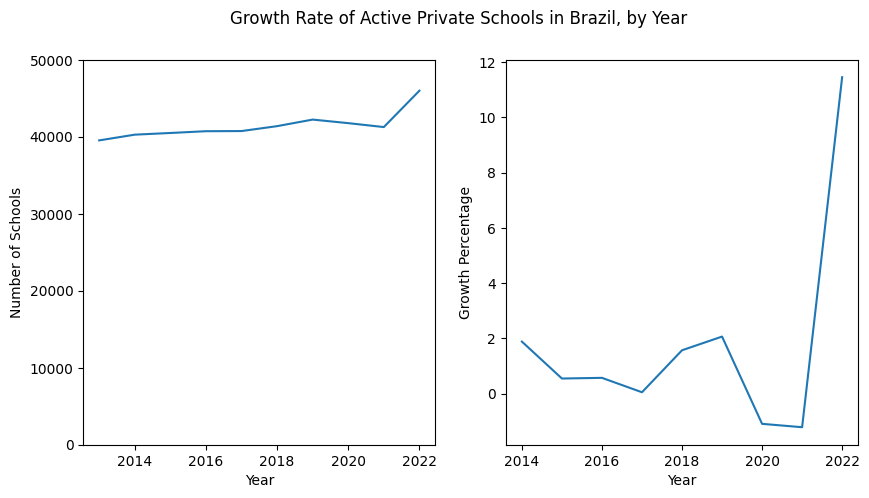

In [53]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Growth Rate of Active Private Schools in Brazil, by Year')

df_schools_by_year.plot(ax = axis[0], xlabel = 'Year', ylabel = 'Number of Schools', ylim = (0, 50000))
df_schools_by_year_growth_rate.plot(ax = axis[1], xlabel = 'Year', ylabel = 'Growth Percentage', legend = False)

After the pandemic, Brazil witnessed a decline in the number of operational private schools for the first time, according to the data series. However, the most recent data indicates a rebound with an increase exceeding 10%. A significant number of new schools were established across the country in the past year.

In [54]:
df_enrollments_by_year = df[['ano', 'quantidade_matricula_educacao_basica']].groupby(['ano'])

In [55]:
df_enrollments_by_year_sum = df_enrollments_by_year.sum()
df_enrollments_by_year_mean = df_enrollments_by_year.mean()

<Axes: xlabel='Year', ylabel='Average Number of Enrollments'>

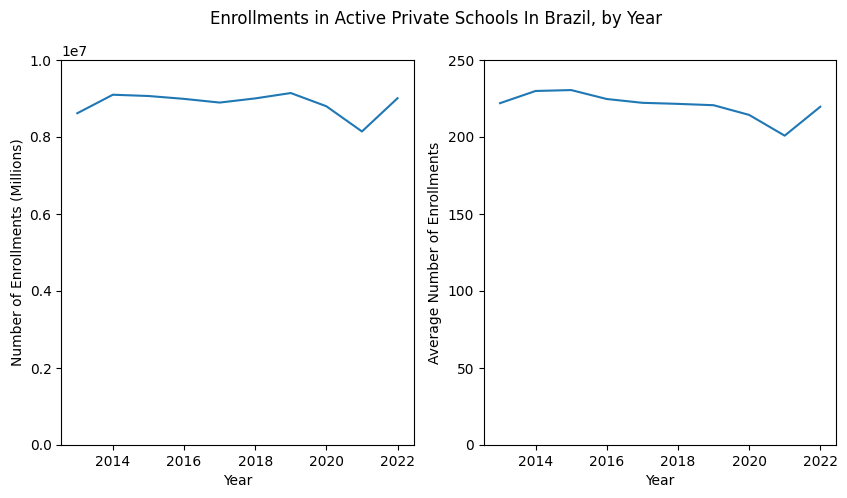

In [56]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Enrollments in Active Private Schools In Brazil, by Year')

df_enrollments_by_year_sum.plot(ax = axis[0], xlabel = 'Year', ylabel = 'Number of Enrollments (Millions)', ylim = (0, 10000000), legend = False)
df_enrollments_by_year_mean.plot(ax = axis[1], xlabel = 'Year', ylabel = 'Average Number of Enrollments', ylim = (0, 250), legend = False)

Although there was a rise in the number of private schools from 2021 to 2022, the total enrollments did not reach the peak seen in previous years. This indicates that the new schools are generally smaller in size. This trend could be attributed to post-pandemic health and sanitation measures or economic considerations, which are beyond the scope of this study for further exploration.

In [57]:
# Adding regions in the dataframe will allow for breakdowns by one of the five brazilian regions. The original dataset have this property already, but was removed after normalization.
regions = {
    'AC': 'North',
    'AP': 'North',
    'AM': 'North',
    'PA': 'North',
    'RO': 'North',
    'RR': 'North',
    'TO': 'North',
    'AL': 'Northeast',
    'BA': 'Northeast',
    'MA': 'Northeast',
    'CE': 'Northeast',
    'PB': 'Northeast',
    'PE': 'Northeast',
    'PI': 'Northeast',
    'RN': 'Northeast',
    'SE': 'Northeast',
    'DF': 'Centerwest',
    'GO': 'Centerwest',
    'MT': 'Centerwest',
    'MS': 'Centerwest',
    'ES': 'Southeast',
    'MG': 'Southeast',
    'RJ': 'Southeast',
    'SP': 'Southeast',
    'PR': 'South',
    'RS': 'South',
    'SC': 'South'
}

df_2022['region'] = df['sigla_uf'].apply(lambda x: regions[x])

In [58]:
"""
@name: build_summary_dataframe
@description: helper function to summarize dataframes that will be fed to plot functions
@params:
- dataframe (Pandas Dataframe): dataframe object
- dimension (string): column that will be used to split values
- metric (string): name of a numeric column that will be aggregated
- aggregation_metrics (string[]): aggregation functions that will be applied to the numeric variable
@return: dataframe
"""
def build_summary_dataframe(dataframe, dimension, metric, aggregation_metrics = ['count', 'mean']):
    _df = pd.DataFrame(dataframe.groupby(dimension)[metric].agg(aggregation_metrics))
    _df['proportion'] = _df['count'].apply(lambda x: x / len(dataframe.index))

    return _df

In [59]:
schools_by_state = df_2022[['region', 'sigla_uf', 'quantidade_matricula_educacao_basica']]

df_schools_by_state = build_summary_dataframe(schools_by_state, 'sigla_uf', 'quantidade_matricula_educacao_basica')
df_schools_by_region = build_summary_dataframe(schools_by_state, 'region', 'quantidade_matricula_educacao_basica')

df_schools_by_state.rename(columns = { 'count': 'schools', 'mean': 'enrollments' }, inplace = True)
df_schools_by_region.rename(columns = { 'count': 'schools', 'mean': 'enrollments' }, inplace = True)

In [60]:
df_schools_by_state.sort_values(by = ['schools', 'proportion'], ascending = False, inplace = True)
df_schools_by_region.sort_values(by = ['schools', 'proportion'], ascending = False, inplace = True)

<Axes: xlabel='Region', ylabel='Proportion of Schools'>

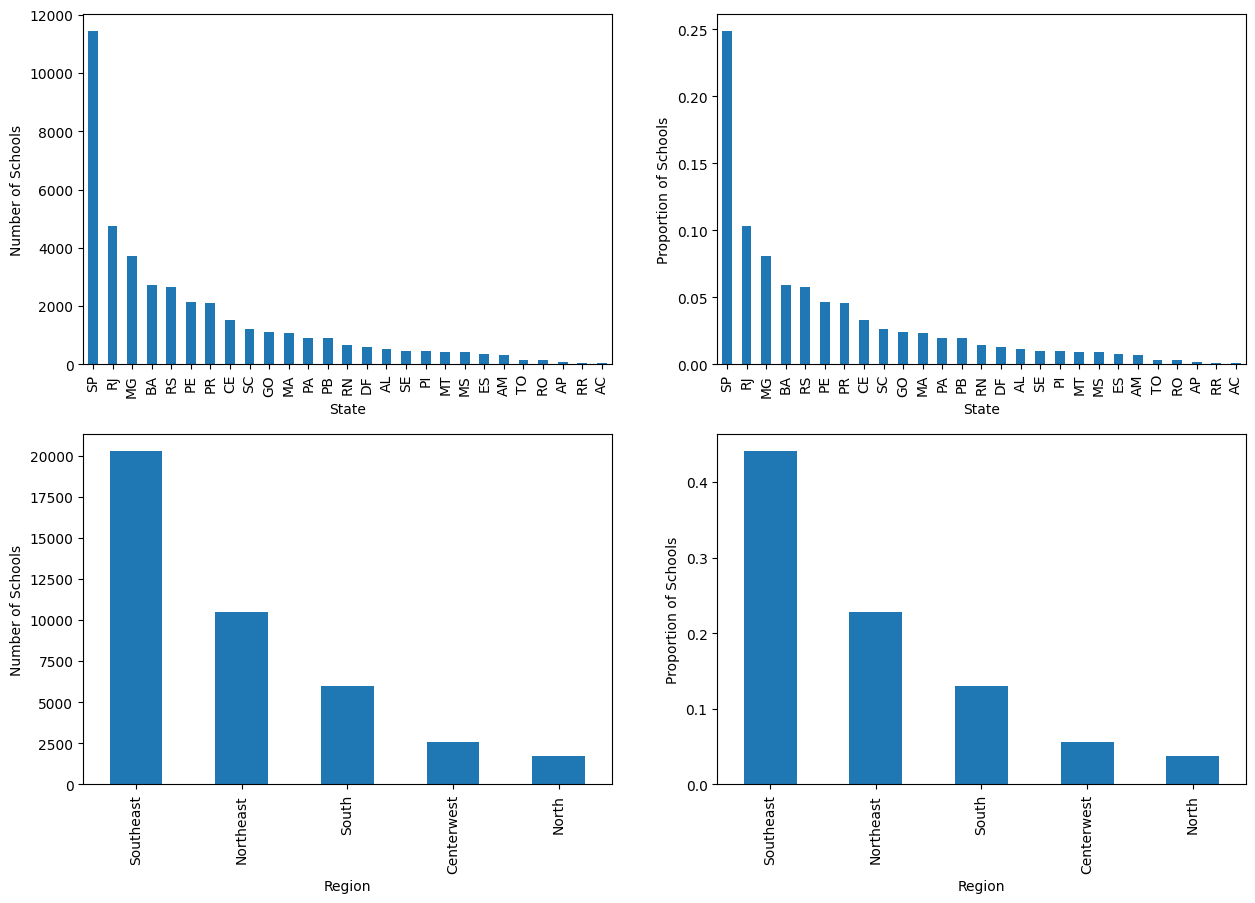

In [61]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

df_schools_by_state['schools'].plot.bar(ax = axes[0][0], xlabel = 'State', ylabel = 'Number of Schools')
df_schools_by_state['proportion'].plot.bar(ax = axes[0][1], xlabel = 'State', ylabel = 'Proportion of Schools')

df_schools_by_region['schools'].plot.bar(ax = axes[1][0], xlabel = 'Region', ylabel = 'Number of Schools')
df_schools_by_region['proportion'].plot.bar(ax = axes[1][1], xlabel = 'Region', ylabel = 'Proportion of Schools')

Nearly half of all private schools in Brazil are situated in the Southeast region, which is also the country's wealthiest region in terms of Gross Domestic Product (GDP).

<Axes: xlabel='Region', ylabel='Average Number of Enrollments'>

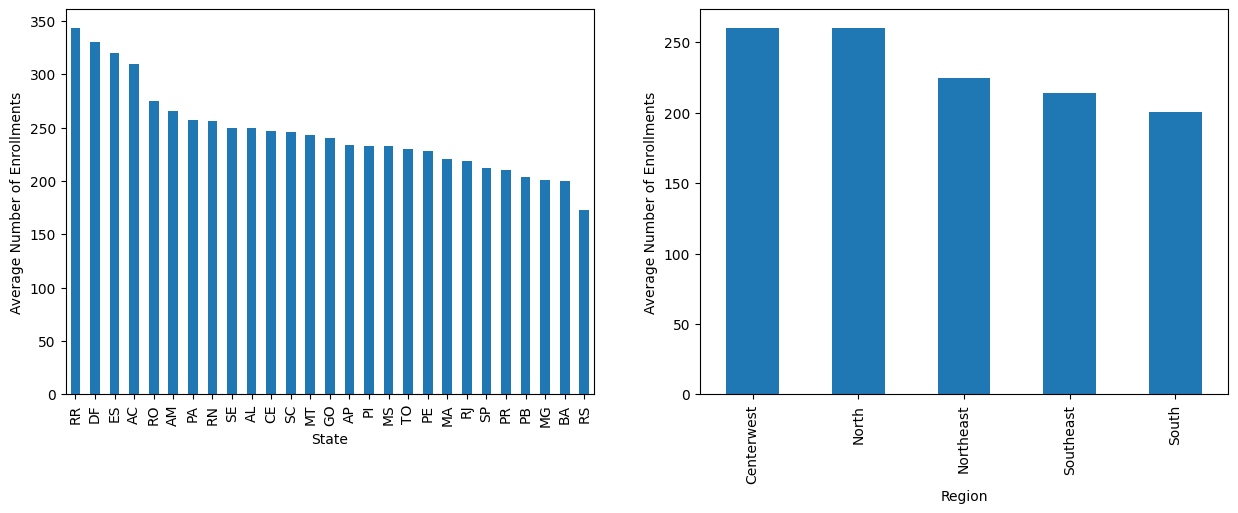

In [62]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

df_schools_by_state.sort_values(by = ['enrollments'], ascending = False)['enrollments'].plot.bar(ax = axes[0], xlabel = 'State', ylabel = 'Average Number of Enrollments')
df_schools_by_region.sort_values(by = ['enrollments'], ascending = False)['enrollments'].plot.bar(ax = axes[1], xlabel = 'Region', ylabel = 'Average Number of Enrollments')

Despite the Southeast region having the highest number of private schools in Brazil, the average enrollment per school is larger in the Centerwest and North regions. The state of São Paulo (SP) accounts for nearly 25% of all student enrollments nationwide, yet it has one of the lowest average student numbers per school among all states. This disparity suggests that the balance between supply and demand for private education outside the wealthiest regions tends towards higher demand.

<Axes: title={'center': 'Count of Non Profit Schools, by Legal Maintainer'}, xlabel='Legal Maintainer', ylabel='Number of Schools'>

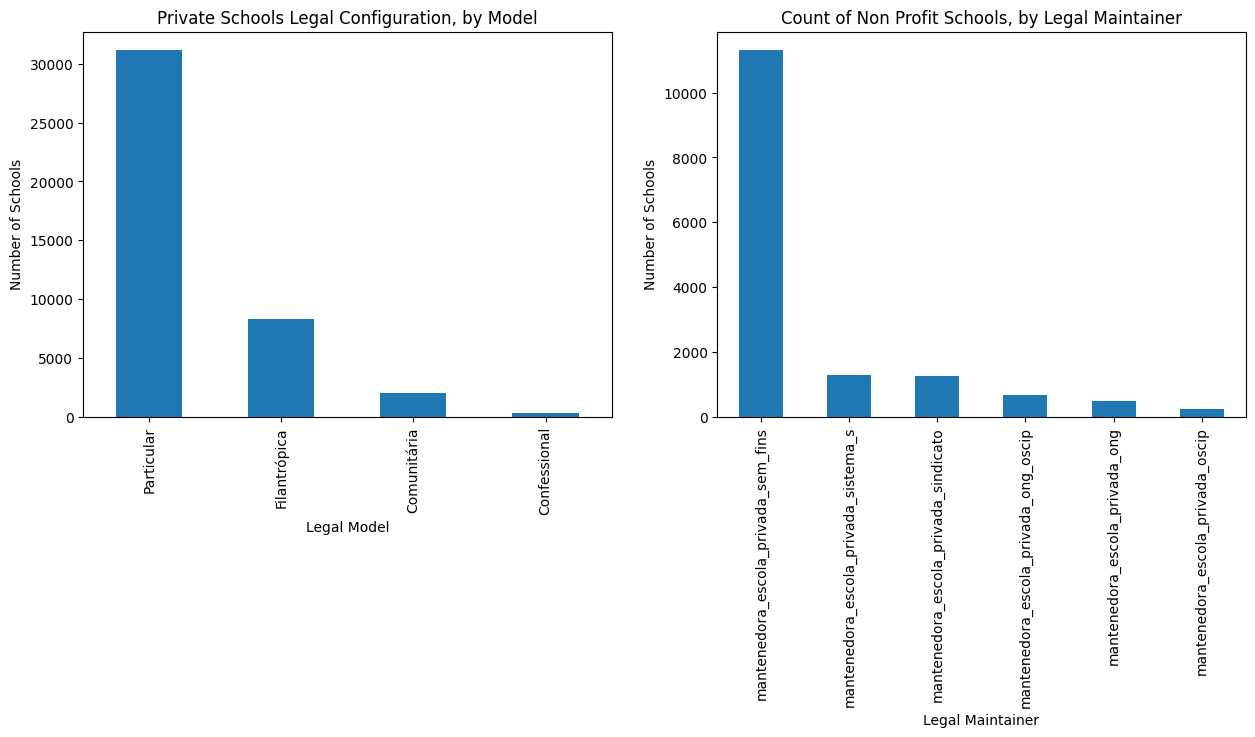

In [63]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

pd.DataFrame(df_2022['tipo_categoria_escola_privada'].value_counts()).rename(index = {1: 'Particular', 2: 'Comunitária', 3: 'Confessional', 4: 'Filantrópica' }).plot.bar(ax = axes[0], legend = False, title = 'Private Schools Legal Configuration, by Model', xlabel = 'Legal Model', ylabel = 'Number of Schools')
df_2022[['mantenedora_escola_privada_ong',
'mantenedora_escola_privada_oscip',
'mantenedora_escola_privada_ong_oscip',
'mantenedora_escola_privada_sindicato',
'mantenedora_escola_privada_sistema_s',
'mantenedora_escola_privada_sem_fins']].sum().sort_values(ascending = False).plot.bar(ax = axes[1], title = 'Count of Non Profit Schools, by Legal Maintainer', xlabel = 'Legal Maintainer', ylabel = 'Number of Schools')

Over two-thirds of private schools in Brazil are operated by private companies, indicating that their primary revenue source is derived from the educational services they provide. The rest are nonprofit organizations, which may collaborate with public companies or other nonprofit entities for management. Among these nonprofits, the majority are managed by another nonprofit organization.

## Technology adoption

This section will explore the adoption and utilization of technological devices.